Loading all our required Libraries

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error , mean_squared_error
from sklearn.model_selection import train_test_split
import os
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,BatchNormalization
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Lasso,Ridge


<h3><b>Part 1 

Loading and combing the datasets


We are going combine all the datasets of diffrent trial of diffrent participates of diffrent tests<br>
WE wil also get combine CSV file of all trails togather for each participates<br>
III means participant performed gaze typing test and II means participant performed free viewing <br>

In [2]:
#For Gaze Test
count = 0
path = "Data/EyeT/gayze_test_letter_card_participant"
data_dir = "Data/EyeT"
participant_ids = range(1, 60)
num_trials = []
# get the number of trials for each participant
for participant_id in participant_ids:
    trial_files = [f for f in os.listdir(data_dir) if f.startswith(f"EyeT_group_dataset_III_image_name_letter_card_participant_{participant_id}")]
    if trial_files:
        num_trials.append(len(trial_files))
    else:
        num_trials.append(0)
# loop over all participants and all their trials
all_trial_dfs = []
for participant_id in participant_ids:
    trial_dfs = []
    for trial_num in range(1, num_trials[participant_id-1] + 1):
        file_path = os.path.join(data_dir, f"EyeT_group_dataset_III_image_name_letter_card_participant_{participant_id}_trial_{trial_num}.csv")
        if os.path.exists(file_path):
            trial_df = pd.read_csv(file_path)
            trial_dfs.append(trial_df)
    # concatenate all the trial data frames for this participant
    if trial_dfs:
        participant_df = pd.concat(trial_dfs, axis=0)
        # Save it as csv
        participant_df.to_csv(os.path.join(path, f"participant_{participant_id}_data.csv"), index=False)
        # count total participates
        count += 1
        all_trial_dfs.append(participant_df)
# concatenate all the participant data frames into one
combine_II_image_name_grey_orange_participant = pd.concat(all_trial_dfs, axis=0)
# Save it as csv
combine_II_image_name_grey_orange_participant.to_csv(os.path.join(path,"all_participants_Q_B.csv.csv"), index=False)



C:\Users\priya\AppData\Local\Temp\ipykernel_22568\1551143461.py:21: DtypeWarning: Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  trial_df = pd.read_csv(file_path)
C:\Users\priya\AppData\Local\Temp\ipykernel_22568\1551143461.py:21: DtypeWarning: Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  trial_df = pd.read_csv(file_path)
C:\Users\priya\AppData\Local\Temp\ipykernel_22568\1551143461.py:21: DtypeWarning: Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  trial_df = pd.read_csv(file_path)
C:\Users\priya\AppData\Local\Temp\ipykernel_22568\1551143461.py:21: DtypeWarning: Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  trial_df = pd.read_csv(file_path)
C:\Users\priya\AppData\Local\Temp\ipykernel_22568\1551143461.py:21: DtypeWarning: Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=Fal

In [3]:
#Lets see total number of participat in this group
print(f" Total Participates in  letter card gaze typing are - {count}")

 Total Participates in  letter card gaze typing are - 30


In [4]:
# For Free viewing of Grey Orange Image
count = 0
path = "Data/EyeT/free_viewing_test_grey_orange_participant"
data_dir = "Data/EyeT"
participant_ids = range(1, 60)
num_trials = []

for participant_id in participant_ids:
    trial_files = [f for f in os.listdir(data_dir) if f.startswith(f"EyeT_group_dataset_II_image_name_grey_orange_participant_{participant_id}")]
    if trial_files:
        num_trials.append(len(trial_files))
    else:
        num_trials.append(0)

all_trial_dfs = []
for participant_id in participant_ids:
    trial_dfs = []
    for trial_num in range(1, num_trials[participant_id-1] + 1):
        file_path = os.path.join(data_dir, f"EyeT_group_dataset_II_image_name_grey_orange_participant_{participant_id}_trial_{trial_num}.csv")
        if os.path.exists(file_path):
            trial_df = pd.read_csv(file_path)
            trial_dfs.append(trial_df)
    if trial_dfs:
        participant_df = pd.concat(trial_dfs, axis=0)
        participant_df.to_csv(os.path.join(path, f"participant_{participant_id}_data.csv"), index=False)
        count += 1
        all_trial_dfs.append(participant_df)

combine_II_image_name_grey_orange_participant = pd.concat(all_trial_dfs, axis=0)
combine_II_image_name_grey_orange_participant.to_csv(os.path.join(path,"all_participants_Q_A_grey_orange.csv"), index=False)



In [5]:
#Lets see total number of participat in this group
print(f" Total Participates in  gery orange image free viewing are - {count}")

 Total Participates in  gery orange image free viewing are - 22


In [6]:
# For Free viewing of Grey Blue Image
count = 0
path = "Data/EyeT/free_viewing_test_grey_blue_participant"
data_dir = "Data/EyeT"
participant_ids = range(1, 60)
num_trials = []

for participant_id in participant_ids:
    trial_files = [f for f in os.listdir(data_dir) if f.startswith(f"EyeT_group_dataset_II_image_name_grey_blue_participant_{participant_id}")]
    if trial_files:
        num_trials.append(len(trial_files))
    else:
        num_trials.append(0)

all_trial_dfs = []
for participant_id in participant_ids:
    trial_dfs = []
    for trial_num in range(1, num_trials[participant_id-1] + 1):
        file_path = os.path.join(data_dir, f"EyeT_group_dataset_II_image_name_grey_blue_participant_{participant_id}_trial_{trial_num}.csv")
        if os.path.exists(file_path):
            trial_df = pd.read_csv(file_path)
            trial_dfs.append(trial_df)
    if trial_dfs:
        participant_df = pd.concat(trial_dfs, axis=0)
        participant_df.to_csv(os.path.join(path, f"participant_{participant_id}_data.csv"), index=False)
        count += 1
        all_trial_dfs.append(participant_df)

combine_II_image_name_grey_orange_participant = pd.concat(all_trial_dfs, axis=0)
combine_II_image_name_grey_orange_participant.to_csv(os.path.join(path,"all_participants_Q_A_grey_blue.csv"), index=False)



In [7]:
#Lets see total number of participat in this group
print(f" Total Participates in  gery blue image free viewing is - {count}")

 Total Participates in  gery blue image free viewing is - 23


In [8]:
 # We can see Some Participate Have given more than one type of Test 

In [3]:
#loading the Combined gaze test data
gaze_test_data=pd.read_csv("Data/EyeT/gayze_test_letter_card_participant/all_participants_Q_B.csv.csv")
#loading the Combined free viewing grey blue data
free_viewing_blue_data=pd.read_csv("Data/EyeT/free_viewing_test_grey_blue_participant/all_participants_Q_A_grey_blue.csv")
#loading the Combined free viewing grey orange data
free_viewing_orange_data=pd.read_csv("Data/EyeT/free_viewing_test_grey_orange_participant/all_participants_Q_A_grey_orange.csv")


C:\Users\priya\AppData\Local\Temp\ipykernel_23004\1334815399.py:2: DtypeWarning: Columns (20,21,34,35,67,68) have mixed types. Specify dtype option on import or set low_memory=False.
  gaze_test_data=pd.read_csv("Data/EyeT/gayze_test_letter_card_participant/all_participants_Q_B.csv.csv")
C:\Users\priya\AppData\Local\Temp\ipykernel_23004\1334815399.py:6: DtypeWarning: Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  free_viewing_orange_data=pd.read_csv("Data/EyeT/free_viewing_test_grey_orange_participant/all_participants_Q_A_grey_orange.csv")


In [10]:

gaze_test_data

,Unnamed: 0,Recording timestamp,Computer timestamp,Sensor,Project name,Export date,Participant name,Recording name,Recording date,Recording date UTC,...,Original Media height,Eye movement type,Gaze event duration,Eye movement type index,Fixation point X,Fixation point Y,Fixation point X (MCSnorm),Fixation point Y (MCSnorm),Mouse position X,Mouse position Y
0,12532,13725441,604307462,NaN,Test group experiment,24.09.2020,Participant0001,Recording2,24.09.2020,24.09.2020,...,NaN,Saccade,25.0,125.0,NaN,NaN,NaN,NaN,NaN,NaN
1,12533,13725441,604307462,NaN,Test group experiment,24.09.2020,Participant0001,Recording2,24.09.2020,24.09.2020,...,NaN,Saccade,25.0,125.0,NaN,NaN,NaN,NaN,NaN,NaN
2,12534,13727290,604309311,Eye Tracker,Test group experiment,24.09.2020,Participant0001,Recording2,24.09.2020,24.09.2020,...,649.0,Saccade,25.0,125.0,NaN,NaN,NaN,NaN,NaN,NaN
3,12535,13735621,604317642,Eye Tracker,Test group experiment,24.09.2020,Participant0001,Recording2,24.09.2020,24.09.2020,...,649.0,Fixation,75.0,43.0,925.0,349.0,"0,4763","0,3232",NaN,NaN
4,12536,13743935,604325956,Eye Tracker,Test group experiment,24.09.2020,Participant0001,Recording2,24.09.2020,24.09.2020,...,649.0,Fixation,75.0,43.0,925.0,349.0,"0,4763","0,3232",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3611015,102967,63277840,1835128303565,NaN,Participant0059,22.09.2021,Participant0059,Recording8,22.09.2021,22.09.2021,...,NaN,Unclassified,17.0,828.0,NaN,NaN,NaN,NaN,NaN,NaN
3611016,102968,63277840,1835128303565,Mouse,Participant0059,22.09.2021,Participant0059,Recording8,22.09.2021,22.09.2021,...,1447.0,Unclassified,17.0,828.0,NaN,NaN,NaN,NaN,-441.0,981.0
3611017,102969,63282267,1835128307992,Eye Tracker,Participant0059,22.09.2021,Participant0059,Recording8,22.09.2021,22.09.2021,...,1447.0,EyesNotFound,8.0,807.0,NaN,NaN,NaN,NaN,NaN,NaN
3611018,102970,63290558,1835128316283,Eye Tracker,Participant0059,22.09.2021,Participant0059,Recording8,22.09.2021,22.09.2021,...,1447.0,Unclassified,8.0,829.0,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
free_viewing_blue_data

,Unnamed: 0,Recording timestamp,Computer timestamp,Sensor,Project name,Export date,Participant name,Recording name,Recording date,Recording date UTC,...,Original Media height,Eye movement type,Gaze event duration,Eye movement type index,Fixation point X,Fixation point Y,Fixation point X (MCSnorm),Fixation point Y (MCSnorm),Mouse position X,Mouse position Y
0,14388,6735083,515109903817,NaN,Control group experiment,30.09.2020,Participant0002,Recording2,30.09.2020,30.09.2020,...,NaN,Fixation,525.0,20.0,908.0,316.0,"0,4688","0,2924",NaN,NaN
1,14389,6735083,515109903817,NaN,Control group experiment,30.09.2020,Participant0002,Recording2,30.09.2020,30.09.2020,...,NaN,Fixation,525.0,20.0,908.0,316.0,"0,4688","0,2924",NaN,NaN
2,14390,6735678,515109904412,Eye Tracker,Control group experiment,30.09.2020,Participant0002,Recording2,30.09.2020,30.09.2020,...,416.0,Fixation,525.0,20.0,908.0,316.0,"0,4688","0,2924",NaN,NaN
3,14391,6744010,515109912744,Eye Tracker,Control group experiment,30.09.2020,Participant0002,Recording2,30.09.2020,30.09.2020,...,416.0,Fixation,525.0,20.0,908.0,316.0,"0,4688","0,2924",NaN,NaN
4,14392,6752340,515109921074,Eye Tracker,Control group experiment,30.09.2020,Participant0002,Recording2,30.09.2020,30.09.2020,...,416.0,Fixation,525.0,20.0,908.0,316.0,"0,4688","0,2924",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457989,23425,63656974,1400421368740,Eye Tracker,Participant0058,17.09.2021,Participant0058,Recording3,17.09.2021,17.09.2021,...,NaN,Fixation,200.0,130.0,1035.0,254.0,NaN,NaN,NaN,NaN
457990,23426,63665274,1400421377040,Eye Tracker,Participant0058,17.09.2021,Participant0058,Recording3,17.09.2021,17.09.2021,...,NaN,Fixation,200.0,130.0,1035.0,254.0,NaN,NaN,NaN,NaN
457991,23427,63673599,1400421385365,Eye Tracker,Participant0058,17.09.2021,Participant0058,Recording3,17.09.2021,17.09.2021,...,NaN,Fixation,200.0,130.0,1035.0,254.0,NaN,NaN,NaN,NaN
457992,23428,63681978,1400421393744,Eye Tracker,Participant0058,17.09.2021,Participant0058,Recording3,17.09.2021,17.09.2021,...,NaN,Fixation,200.0,130.0,1035.0,254.0,NaN,NaN,NaN,NaN


In [12]:
free_viewing_orange_data

,Unnamed: 0,Recording timestamp,Computer timestamp,Sensor,Project name,Export date,Participant name,Recording name,Recording date,Recording date UTC,...,Original Media height,Eye movement type,Gaze event duration,Eye movement type index,Fixation point X,Fixation point Y,Fixation point X (MCSnorm),Fixation point Y (MCSnorm),Mouse position X,Mouse position Y
0,8829,4342254,2109851059,NaN,Participant0012,29.10.2020,Participant0012,Recording2,29.10.2020,29.10.2020,...,NaN,Unclassified,8.0,36.0,NaN,NaN,NaN,NaN,NaN,NaN
1,8830,4342254,2109851059,NaN,Participant0012,29.10.2020,Participant0012,Recording2,29.10.2020,29.10.2020,...,NaN,Unclassified,8.0,36.0,NaN,NaN,NaN,NaN,NaN,NaN
2,8831,4345325,2109854130,Eye Tracker,Participant0012,29.10.2020,Participant0012,Recording2,29.10.2020,29.10.2020,...,692.0,Unclassified,8.0,36.0,NaN,NaN,NaN,NaN,NaN,NaN
3,8832,4353746,2109862551,Eye Tracker,Participant0012,29.10.2020,Participant0012,Recording2,29.10.2020,29.10.2020,...,692.0,EyesNotFound,17.0,34.0,NaN,NaN,NaN,NaN,NaN,NaN
4,8833,4362056,2109870861,Eye Tracker,Participant0012,29.10.2020,Participant0012,Recording2,29.10.2020,29.10.2020,...,692.0,EyesNotFound,17.0,34.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242674,15691,64073742,1400303390901,Eye Tracker,Participant0058,17.09.2021,Participant0058,Recording2,17.09.2021,17.09.2021,...,692.0,Unclassified,17.0,221.0,NaN,NaN,NaN,NaN,NaN,NaN
242675,15692,64082121,1400303399280,Eye Tracker,Participant0058,17.09.2021,Participant0058,Recording2,17.09.2021,17.09.2021,...,692.0,Unclassified,17.0,221.0,NaN,NaN,NaN,NaN,NaN,NaN
242676,15693,64090409,1400303407568,Eye Tracker,Participant0058,17.09.2021,Participant0058,Recording2,17.09.2021,17.09.2021,...,692.0,EyesNotFound,8.0,115.0,NaN,NaN,NaN,NaN,NaN,NaN
242677,15694,64095763,1400303412922,NaN,Participant0058,17.09.2021,Participant0058,Recording2,17.09.2021,17.09.2021,...,NaN,Unclassified,8.0,222.0,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
# Combining all the data
#combined_data = pd.concat([ gaze_test_data,free_viewing_blue_data, free_viewing_orange_data])
# We are only using free_viewing_blue_data as combing whole data will consume way more time and computasnal power
combined_data = free_viewing_blue_data.copy()


<h3><b>Part 2

Analyising the data

In [50]:
combined_data

,Unnamed: 0,Recording timestamp,Computer timestamp,Sensor,Project name,Export date,Participant name,Recording name,Recording date,Recording date UTC,...,Original Media height,Eye movement type,Gaze event duration,Eye movement type index,Fixation point X,Fixation point Y,Fixation point X (MCSnorm),Fixation point Y (MCSnorm),Mouse position X,Mouse position Y
0,14388,6735083,515109903817,NaN,Control group experiment,30.09.2020,Participant0002,Recording2,30.09.2020,30.09.2020,...,NaN,Fixation,525.0,20.0,908.0,316.0,"0,4688","0,2924",NaN,NaN
1,14389,6735083,515109903817,NaN,Control group experiment,30.09.2020,Participant0002,Recording2,30.09.2020,30.09.2020,...,NaN,Fixation,525.0,20.0,908.0,316.0,"0,4688","0,2924",NaN,NaN
2,14390,6735678,515109904412,Eye Tracker,Control group experiment,30.09.2020,Participant0002,Recording2,30.09.2020,30.09.2020,...,416.0,Fixation,525.0,20.0,908.0,316.0,"0,4688","0,2924",NaN,NaN
3,14391,6744010,515109912744,Eye Tracker,Control group experiment,30.09.2020,Participant0002,Recording2,30.09.2020,30.09.2020,...,416.0,Fixation,525.0,20.0,908.0,316.0,"0,4688","0,2924",NaN,NaN
4,14392,6752340,515109921074,Eye Tracker,Control group experiment,30.09.2020,Participant0002,Recording2,30.09.2020,30.09.2020,...,416.0,Fixation,525.0,20.0,908.0,316.0,"0,4688","0,2924",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457989,23425,63656974,1400421368740,Eye Tracker,Participant0058,17.09.2021,Participant0058,Recording3,17.09.2021,17.09.2021,...,NaN,Fixation,200.0,130.0,1035.0,254.0,NaN,NaN,NaN,NaN
457990,23426,63665274,1400421377040,Eye Tracker,Participant0058,17.09.2021,Participant0058,Recording3,17.09.2021,17.09.2021,...,NaN,Fixation,200.0,130.0,1035.0,254.0,NaN,NaN,NaN,NaN
457991,23427,63673599,1400421385365,Eye Tracker,Participant0058,17.09.2021,Participant0058,Recording3,17.09.2021,17.09.2021,...,NaN,Fixation,200.0,130.0,1035.0,254.0,NaN,NaN,NaN,NaN
457992,23428,63681978,1400421393744,Eye Tracker,Participant0058,17.09.2021,Participant0058,Recording3,17.09.2021,17.09.2021,...,NaN,Fixation,200.0,130.0,1035.0,254.0,NaN,NaN,NaN,NaN


In [16]:
# using The pandas profiling pacage to get an genral idea about the data set
# do not run it as it takes quite some time to load
#profile = ProfileReport(combined_data, title="Report", html={"style":{"full_width":True}})
#profile.to_notebook_iframe()

# Exporting the report as a PDF
#profile.to_file("free_viewing_blue_data.html")
# All the plots is availabe in that Report PDF

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summary of our data


Recording Fixation filter name has constant value "Tobii I-VT (Fixation)"	Constant<br>
Recording software version has constant value "1.145.28180"	Constant<br>
Recording resolution height has constant value "1080"	Constant<br>
Recording resolution width has constant value "1920"	Constant<br>
Recording monitor latency has constant value "10,00"	Constant<br>
Recording start time has a high cardinality: 71 distinct values	High cardinality<br>
Recording start time UTC has a high cardinality: 71 distinct values	High cardinality<br>
Gaze direction left X has a high cardinality: 69318 distinct values	High cardinality<br>
Gaze direction left Y has a high cardinality: 65136 distinct values	High cardinality<br>
Gaze direction left Z has a high cardinality: 13815 distinct values	High cardinality<br>
Gaze direction right X has a high cardinality: 67686 distinct values	High cardinality<br>
Gaze direction right Y has a high cardinality: 63993 distinct values	High cardinality<br>
Gaze direction right Z has a high cardinality: 13205 distinct values	High cardinality<br>
Pupil diameter left has a high cardinality: 515 distinct values	High cardinality<br>
Pupil diameter right has a high cardinality: 544 distinct values	High cardinality<br>
Eye position left X (DACSmm) has a high cardinality: 1958 distinct values	High cardinality<br>
Eye position left Y (DACSmm) has a high cardinality: 2723 distinct values	High cardinality<br>
Eye position left Z (DACSmm) has a high cardinality: 5014 distinct values	High cardinality<br>
Eye position right X (DACSmm) has a high cardinality: 2052 distinct values	High cardinality<br>
Eye position right Y (DACSmm) has a high cardinality: 2819 distinct values	High cardinality<br>
Eye position right Z (DACSmm) has a high cardinality: 5226 distinct values	High cardinality<br>
Gaze point left X (DACSmm) has a high cardinality: 6100 distinct values	High cardinality<br>
Gaze point left Y (DACSmm) has a high cardinality: 4022 distinct values	High cardinality<br>
Gaze point right X (DACSmm) has a high cardinality: 5846 distinct values	High cardinality<br>
Gaze point right Y (DACSmm) has a high cardinality: 4076 distinct values	High cardinality<br>
Gaze point X (MCSnorm) has a high cardinality: 9972 distinct values	High cardinality<br>
Gaze point Y (MCSnorm) has a high cardinality: 9997 distinct values	High cardinality<br>
Gaze point left X (MCSnorm) has a high cardinality: 9929 distinct values	High cardinality<br>
Gaze point left Y (MCSnorm) has a high cardinality: 9985 distinct values	High cardinality<br>
Gaze point right X (MCSnorm) has a high cardinality: 9952 distinct values	High cardinality<br>
Gaze point right Y (MCSnorm) has a high cardinality: 9989 distinct values	High cardinality<br>
Fixation point X (MCSnorm) has a high cardinality: 5369 distinct values	High cardinality<br>
Fixation point Y (MCSnorm) has a high cardinality: 5742 distinct values	High cardinality<br>
Sensor is highly imbalanced (90.6%)	Imbalance<br>
Presented Media height is highly imbalanced (66.0%)	Imbalance<br>
Presented Media position Y (DACSpx) is highly imbalanced (66.0%)	Imbalance<br>
Eyetracker timestamp has 9375 (1.3%) missing values	Missing<br>
Event has 699769 (99.9%) missing values	Missing<br>
Event value has 699861 (99.9%) missing values	Missing<br>
Gaze point X has 96542 (13.8%) missing values	Missing<br>
Gaze point Y has 96542 (13.8%) missing values	Missing<br>
Gaze point left X has 142495 (20.3%) missing values	Missing<br>
Gaze point left Y has 142495 (20.3%) missing values	Missing<br>
Gaze point right X has 178134 (25.4%) missing values	Missing<br>
Gaze point right Y has 178134 (25.4%) missing values	Missing<br>
Gaze direction left X has 142495 (20.3%) missing values	Missing<br>
Gaze direction left Y has 142495 (20.3%) missing values	Missing<br>
Gaze direction left Z has 142495 (20.3%) missing values	Missing<br>
Gaze direction right X has 178134 (25.4%) missing values	Missing<br>
Gaze direction right Y has 178134 (25.4%) missing values	Missing<br>
Gaze direction right Z has 178134 (25.4%) missing values	Missing<br>
Pupil diameter left has 523855 (74.8%) missing values	Missing<br>
Pupil diameter right has 535093 (76.4%) missing values	Missing<br>
Validity left has 9375 (1.3%) missing values	Missing<br>
Validity right has 9375 (1.3%) missing values	Missing<br>
Eye position left X (DACSmm) has 142495 (20.3%) missing values	Missing<br>
Eye position left Y (DACSmm) has 142495 (20.3%) missing values	Missing<br>
Eye position left Z (DACSmm) has 142495 (20.3%) missing values	Missing<br>
Eye position right X (DACSmm) has 178134 (25.4%) missing values	Missing<br>
Eye position right Y (DACSmm) has 178134 (25.4%) missing values	Missing<br>
Eye position right Z (DACSmm) has 178134 (25.4%) missing values	Missing<br>
Gaze point left X (DACSmm) has 142495 (20.3%) missing values	Missing<br>
Gaze point left Y (DACSmm) has 142495 (20.3%) missing values	Missing<br>
Gaze point right X (DACSmm) has 178134 (25.4%) missing values	Missing<br>
Gaze point right Y (DACSmm) has 178134 (25.4%) missing values	Missing<br>
Gaze point X (MCSnorm) has 137536 (19.6%) missing values	Missing<br>
Gaze point Y (MCSnorm) has 137536 (19.6%) missing values	Missing<br>
Gaze point left X (MCSnorm) has 179965 (25.7%) missing values	Missing<br>
Gaze point left Y (MCSnorm) has 179965 (25.7%) missing values	Missing<br>
Gaze point right X (MCSnorm) has 216903 (31.0%) missing values	Missing<br>
Gaze point right Y (MCSnorm) has 216903 (31.0%) missing values	Missing<br>
Fixation point X has 305472 (43.6%) missing values	Missing<br>
Fixation point Y has 305472 (43.6%) missing values	Missing<br>
Fixation point X (MCSnorm) has 327499 (46.7%) missing values	Missing<br>
Fixation point Y (MCSnorm) has 327499 (46.7%) missing values	Missing<br>
Mouse position X has 692202 (98.8%) missing values	Missing<br>
Mouse position Y has 692202 (98.8%) missing values<br>

In [51]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457994 entries, 0 to 457993
Data columns (total 71 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Unnamed: 0                           457994 non-null  int64  
 1   Recording timestamp                  457994 non-null  int64  
 2   Computer timestamp                   457994 non-null  int64  
 3   Sensor                               457231 non-null  object 
 4   Project name                         457994 non-null  object 
 5   Export date                          457994 non-null  object 
 6   Participant name                     457994 non-null  object 
 7   Recording name                       457994 non-null  object 
 8   Recording date                       457994 non-null  object 
 9   Recording date UTC                   457994 non-null  object 
 10  Recording start time                 457994 non-null  object 
 11  Recording sta

<h3><b>Part 3

Preprocessing the data

In [52]:
#as most features  data type is string we need to convert it to float and change , to . due to which it is interpreted as object
combined_data['Pupil diameter right'] = combined_data['Pupil diameter left'].str.replace(',', '.').astype(float)
combined_data['Pupil diameter left'] = combined_data['Pupil diameter left'].str.replace(',', '.').astype(float)
combined_data['Eye position left X (DACSmm)'] = combined_data['Eye position left X (DACSmm)'].str.replace(',', '.').astype(float)
combined_data['Eye position left Y (DACSmm)'] = combined_data['Eye position left Y (DACSmm)'].str.replace(',', '.').astype(float)
combined_data['Eye position left Z (DACSmm)'] = combined_data['Eye position left Z (DACSmm)'].str.replace(',', '.').astype(float)
combined_data['Eye position right X (DACSmm)'] = combined_data['Eye position right X (DACSmm)'].str.replace(',', '.').astype(float)
combined_data['Eye position right Y (DACSmm)'] = combined_data['Eye position right Y (DACSmm)'].str.replace(',', '.').astype(float)
combined_data['Eye position right Z (DACSmm)'] = combined_data['Eye position right Z (DACSmm)'].str.replace(',', '.').astype(float)
combined_data['Gaze point left X (DACSmm)'] = combined_data['Gaze point left X (DACSmm)'].str.replace(',', '.').astype(float)
combined_data['Gaze point left Y (DACSmm)'] = combined_data['Gaze point left Y (DACSmm)'].str.replace(',', '.').astype(float)
combined_data['Gaze point right X (DACSmm)'] = combined_data['Gaze point right X (DACSmm)'].str.replace(',', '.').astype(float)
combined_data['Gaze point right Y (DACSmm)'] = combined_data['Gaze point right Y (DACSmm)'].str.replace(',', '.').astype(float)
combined_data['Gaze point X (MCSnorm)'] = combined_data['Gaze point X (MCSnorm)'].str.replace(',', '.').astype(float)
combined_data['Gaze point Y (MCSnorm)'] = combined_data['Gaze point Y (MCSnorm)'].str.replace(',', '.').astype(float)
combined_data['Gaze point left X (MCSnorm)'] = combined_data['Gaze point left X (MCSnorm)'].str.replace(',', '.').astype(float)
combined_data['Gaze point left Y (MCSnorm)'] = combined_data['Gaze point left Y (MCSnorm)'].str.replace(',', '.').astype(float)
combined_data['Gaze point right X (MCSnorm)'] = combined_data['Gaze point right X (MCSnorm)'].str.replace(',', '.').astype(float)
combined_data['Gaze point right Y (MCSnorm)'] = combined_data['Gaze point right Y (MCSnorm)'].str.replace(',', '.').astype(float)
combined_data['Fixation point X (MCSnorm)'] = combined_data['Fixation point X (MCSnorm)'].str.replace(',', '.').astype(float)
combined_data['Fixation point Y (MCSnorm)'] = combined_data['Fixation point Y (MCSnorm)'].str.replace(',', '.').astype(float)
combined_data['Gaze direction left X'] = combined_data['Gaze direction left X'].str.replace(',', '.').astype(float)
combined_data['Gaze direction left Y'] = combined_data['Gaze direction left Y'].str.replace(',', '.').astype(float)
combined_data['Gaze direction left Z'] = combined_data['Gaze direction left Z'].str.replace(',', '.').astype(float)
combined_data['Gaze direction right X'] = combined_data['Gaze direction right X'].str.replace(',', '.').astype(float)
combined_data['Gaze direction right Y'] = combined_data['Gaze direction right Y'].str.replace(',', '.').astype(float)
combined_data['Gaze direction right Z'] = combined_data['Gaze direction right Z'].str.replace(',', '.').astype(float)


In [53]:
#preprocessing to ensure that the date and time variables are in a consistent and machine-readable format
format_string = "%Y-%m-%d"


combined_data['Export date'] = pd.to_datetime(combined_data['Export date'], errors='coerce')

combined_data['Recording date'] = pd.to_datetime(combined_data['Export date'], errors='coerce')


combined_data['Recording date UTC'] = pd.to_datetime(combined_data['Recording date UTC'], errors='coerce')


combined_data['Recording start time'] = pd.to_datetime(combined_data['Recording start time'], errors='coerce')


combined_data['Recording start time UTC'] = pd.to_datetime(combined_data['Recording start time UTC'], errors='coerce')




C:\Users\priya\AppData\Local\Temp\ipykernel_23004\1270635288.py:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  combined_data['Export date'] = pd.to_datetime(combined_data['Export date'], errors='coerce')
C:\Users\priya\AppData\Local\Temp\ipykernel_23004\1270635288.py:10: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  combined_data['Recording date UTC'] = pd.to_datetime(combined_data['Recording date UTC'], errors='coerce')


In [54]:
combined_data

,Unnamed: 0,Recording timestamp,Computer timestamp,Sensor,Project name,Export date,Participant name,Recording name,Recording date,Recording date UTC,...,Original Media height,Eye movement type,Gaze event duration,Eye movement type index,Fixation point X,Fixation point Y,Fixation point X (MCSnorm),Fixation point Y (MCSnorm),Mouse position X,Mouse position Y
0,14388,6735083,515109903817,NaN,Control group experiment,2020-09-30,Participant0002,Recording2,2020-09-30,2020-09-30,...,NaN,Fixation,525.0,20.0,908.0,316.0,0.4688,0.2924,NaN,NaN
1,14389,6735083,515109903817,NaN,Control group experiment,2020-09-30,Participant0002,Recording2,2020-09-30,2020-09-30,...,NaN,Fixation,525.0,20.0,908.0,316.0,0.4688,0.2924,NaN,NaN
2,14390,6735678,515109904412,Eye Tracker,Control group experiment,2020-09-30,Participant0002,Recording2,2020-09-30,2020-09-30,...,416.0,Fixation,525.0,20.0,908.0,316.0,0.4688,0.2924,NaN,NaN
3,14391,6744010,515109912744,Eye Tracker,Control group experiment,2020-09-30,Participant0002,Recording2,2020-09-30,2020-09-30,...,416.0,Fixation,525.0,20.0,908.0,316.0,0.4688,0.2924,NaN,NaN
4,14392,6752340,515109921074,Eye Tracker,Control group experiment,2020-09-30,Participant0002,Recording2,2020-09-30,2020-09-30,...,416.0,Fixation,525.0,20.0,908.0,316.0,0.4688,0.2924,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457989,23425,63656974,1400421368740,Eye Tracker,Participant0058,2021-09-17,Participant0058,Recording3,2021-09-17,2021-09-17,...,NaN,Fixation,200.0,130.0,1035.0,254.0,NaN,NaN,NaN,NaN
457990,23426,63665274,1400421377040,Eye Tracker,Participant0058,2021-09-17,Participant0058,Recording3,2021-09-17,2021-09-17,...,NaN,Fixation,200.0,130.0,1035.0,254.0,NaN,NaN,NaN,NaN
457991,23427,63673599,1400421385365,Eye Tracker,Participant0058,2021-09-17,Participant0058,Recording3,2021-09-17,2021-09-17,...,NaN,Fixation,200.0,130.0,1035.0,254.0,NaN,NaN,NaN,NaN
457992,23428,63681978,1400421393744,Eye Tracker,Participant0058,2021-09-17,Participant0058,Recording3,2021-09-17,2021-09-17,...,NaN,Fixation,200.0,130.0,1035.0,254.0,NaN,NaN,NaN,NaN


Ploting some timeseires plots 

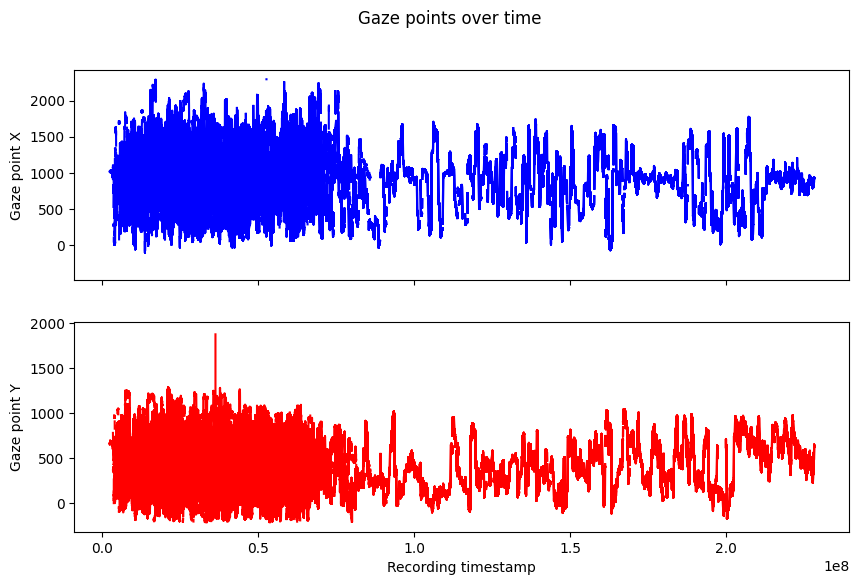

In [55]:
fig, axes = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

axes[0].plot(combined_data['Recording timestamp'], combined_data['Gaze point X'], color='blue')
axes[0].set_ylabel('Gaze point X')
axes[1].plot(combined_data['Recording timestamp'], combined_data['Gaze point Y'], color='red')
axes[1].set_ylabel('Gaze point Y')
axes[1].set_xlabel('Recording timestamp')

fig.suptitle('Gaze points over time')
plt.show()


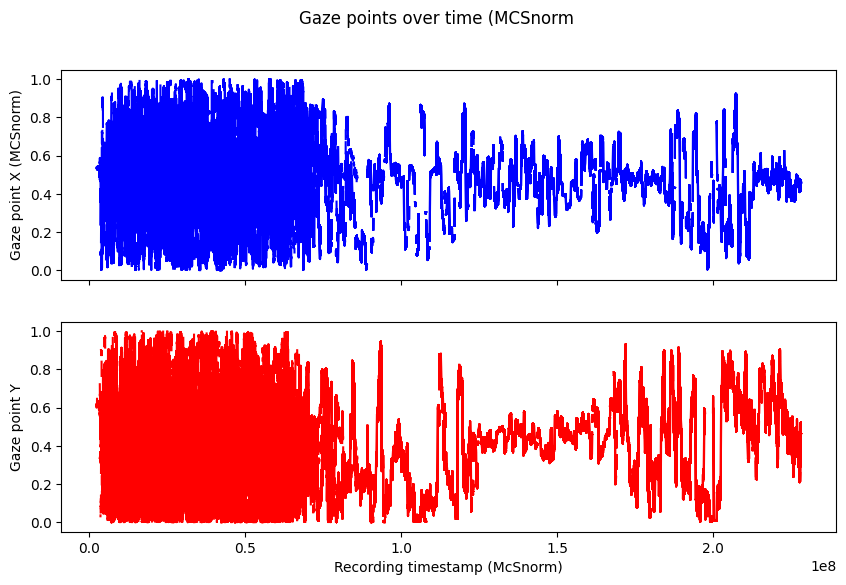

In [56]:
fig, axes = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

axes[0].plot(combined_data['Recording timestamp'], combined_data['Gaze point X (MCSnorm)'], color='blue')
axes[0].set_ylabel('Gaze point X (MCSnorm)')
axes[1].plot(combined_data['Recording timestamp'], combined_data['Gaze point Y (MCSnorm)'], color='red')
axes[1].set_ylabel('Gaze point Y')
axes[1].set_xlabel('Recording timestamp (McSnorm)')

fig.suptitle('Gaze points over time (MCSnorm')
plt.show()


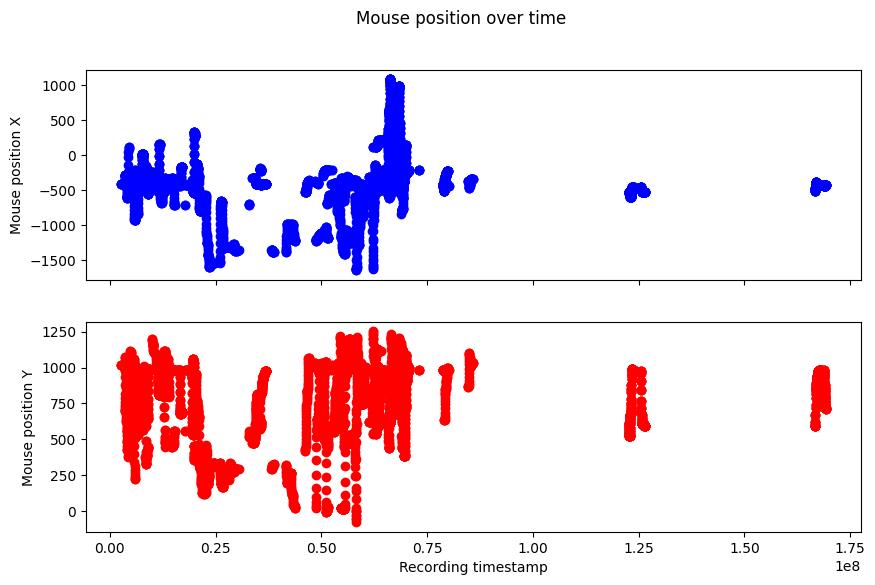

In [57]:
fig, axes = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

axes[0].scatter(combined_data['Recording timestamp'], combined_data['Mouse position X'], color='blue')
axes[0].set_ylabel('Mouse position X')
axes[1].scatter(combined_data['Recording timestamp'], combined_data['Mouse position Y'], color='red')
axes[1].set_ylabel('Mouse position Y')
axes[1].set_xlabel('Recording timestamp')

fig.suptitle('Mouse position over time')
plt.show()


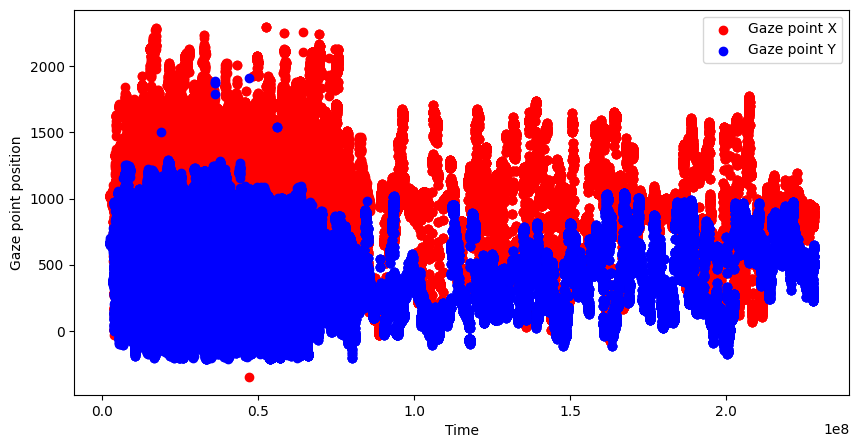

In [58]:

# Create a new figure
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the gaze point X and Y values over time
ax.scatter(combined_data['Recording timestamp'], combined_data["Gaze point X"], label="Gaze point X",color="red")
ax.scatter(combined_data['Recording timestamp'], combined_data["Gaze point Y"], label="Gaze point Y",color="blue")

# Set the axis labels and legend
ax.set_xlabel("Time")
ax.set_ylabel("Gaze point position")
ax.legend()

# Show the plot
plt.show()


In [59]:
#Coverting participant name from Participant0001 to 1 etc 
participant_dict = {}
for i in range(1, 61):
    participant_dict[f"Participant{i:04d}"] = i

combined_data["Participant name"] = combined_data["Participant name"].map(participant_dict)


In [60]:
combined_data

,Unnamed: 0,Recording timestamp,Computer timestamp,Sensor,Project name,Export date,Participant name,Recording name,Recording date,Recording date UTC,...,Original Media height,Eye movement type,Gaze event duration,Eye movement type index,Fixation point X,Fixation point Y,Fixation point X (MCSnorm),Fixation point Y (MCSnorm),Mouse position X,Mouse position Y
0,14388,6735083,515109903817,NaN,Control group experiment,2020-09-30,2,Recording2,2020-09-30,2020-09-30,...,NaN,Fixation,525.0,20.0,908.0,316.0,0.4688,0.2924,NaN,NaN
1,14389,6735083,515109903817,NaN,Control group experiment,2020-09-30,2,Recording2,2020-09-30,2020-09-30,...,NaN,Fixation,525.0,20.0,908.0,316.0,0.4688,0.2924,NaN,NaN
2,14390,6735678,515109904412,Eye Tracker,Control group experiment,2020-09-30,2,Recording2,2020-09-30,2020-09-30,...,416.0,Fixation,525.0,20.0,908.0,316.0,0.4688,0.2924,NaN,NaN
3,14391,6744010,515109912744,Eye Tracker,Control group experiment,2020-09-30,2,Recording2,2020-09-30,2020-09-30,...,416.0,Fixation,525.0,20.0,908.0,316.0,0.4688,0.2924,NaN,NaN
4,14392,6752340,515109921074,Eye Tracker,Control group experiment,2020-09-30,2,Recording2,2020-09-30,2020-09-30,...,416.0,Fixation,525.0,20.0,908.0,316.0,0.4688,0.2924,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457989,23425,63656974,1400421368740,Eye Tracker,Participant0058,2021-09-17,58,Recording3,2021-09-17,2021-09-17,...,NaN,Fixation,200.0,130.0,1035.0,254.0,NaN,NaN,NaN,NaN
457990,23426,63665274,1400421377040,Eye Tracker,Participant0058,2021-09-17,58,Recording3,2021-09-17,2021-09-17,...,NaN,Fixation,200.0,130.0,1035.0,254.0,NaN,NaN,NaN,NaN
457991,23427,63673599,1400421385365,Eye Tracker,Participant0058,2021-09-17,58,Recording3,2021-09-17,2021-09-17,...,NaN,Fixation,200.0,130.0,1035.0,254.0,NaN,NaN,NaN,NaN
457992,23428,63681978,1400421393744,Eye Tracker,Participant0058,2021-09-17,58,Recording3,2021-09-17,2021-09-17,...,NaN,Fixation,200.0,130.0,1035.0,254.0,NaN,NaN,NaN,NaN


In [61]:
# loading the questinor data set as it has the empathy score
score=pd.read_csv("Data/questionnaire/Questionnaire_datasetIB.csv", encoding='latin1')
#Changing The score column name Participant nr to  Participant name so that it is eassy to merge
score = score.rename(columns={"Participant nr": "Participant name"})




In [62]:
score.head()

,Participant name,NR,Created,Modified,I have read and understood the information about the study and all the information in this form is explained to me and I am willing to participate,I want to participate.,I sometimes find it difficult to see things from the other guys point of view.,"I am usually objective when I watch a film or play, and I dont often get completely caught up in it.",I try to look at everybodys side of a disagreement before I make a decision.,I sometimes try to understand my friends better by imagining how things look from their perspective.,...,"If someone is suffering from stutter, I prefer speaking rather than texting.",I try to be patient when people speak with me very slowly.,"In a situation, when there are handicapped students in a classroom, the pace of the class should be adapted to the handicapped student.","In a situation, when there are only one handicapped student in a classroom, the pace of the class should be adapted to him/her independently of how many students are in the class.","I feel impatient when people communicate slowly, so I complete other peoples sentences to make the communication more efficient.",I believe that the handicapped students should catch the pace of the group in a classroom to not delay the progress of other students.,I feel left out (or excluded) when I cannot participate in a conversation.,Total Score extended,Total Score original,Elapsed time
0,1,9534500,24.09.2020 16:00,24.09.2020 16:00,Yes,Proceed,1,3,4,4,...,1,4,4,4,1,2,4,137,109,5 minutes 5 seconds
1,2,9597659,30.09.2020 15:14,30.09.2020 15:14,Yes,Proceed,2,2,4,4,...,2,4,3,3,4,2,2,127,100,5 minutes 55 seconds
2,3,9637453,01.10.2020 16:20,01.10.2020 16:20,Yes,Proceed,4,1,4,4,...,3,3,3,2,3,3,2,123,98,6 minutes 49 seconds
3,4,9732460,06.10.2020 16:45,06.10.2020 16:45,Yes,Proceed,2,3,3,3,...,2,3,4,3,2,4,2,120,95,8 minutes 39 seconds
4,5,9732853,06.10.2020 17:24,06.10.2020 17:24,Yes,Proceed,2,3,4,3,...,3,4,2,1,4,3,4,124,97,7 minutes 27 seconds


In [63]:
# Merge the two datasets based on the Participant name column
combined_data = pd.merge(combined_data, score[['Participant name', 'Total Score extended']], on='Participant name', how='left')



# Set the timestamp column as the index of the DataFrame
combined_data.set_index("Recording timestamp", inplace=True)


In [64]:
combined_data

,Unnamed: 0,Computer timestamp,Sensor,Project name,Export date,Participant name,Recording name,Recording date,Recording date UTC,Recording start time,...,Eye movement type,Gaze event duration,Eye movement type index,Fixation point X,Fixation point Y,Fixation point X (MCSnorm),Fixation point Y (MCSnorm),Mouse position X,Mouse position Y,Total Score extended
Recording timestamp,,,,,,,,,,,,,,,,,,,,,
6735083,14388,515109903817,NaN,Control group experiment,2020-09-30,2,Recording2,2020-09-30,2020-09-30,2023-04-23 14:53:16.980,...,Fixation,525.0,20.0,908.0,316.0,0.4688,0.2924,NaN,NaN,127
6735083,14389,515109903817,NaN,Control group experiment,2020-09-30,2,Recording2,2020-09-30,2020-09-30,2023-04-23 14:53:16.980,...,Fixation,525.0,20.0,908.0,316.0,0.4688,0.2924,NaN,NaN,127
6735678,14390,515109904412,Eye Tracker,Control group experiment,2020-09-30,2,Recording2,2020-09-30,2020-09-30,2023-04-23 14:53:16.980,...,Fixation,525.0,20.0,908.0,316.0,0.4688,0.2924,NaN,NaN,127
6744010,14391,515109912744,Eye Tracker,Control group experiment,2020-09-30,2,Recording2,2020-09-30,2020-09-30,2023-04-23 14:53:16.980,...,Fixation,525.0,20.0,908.0,316.0,0.4688,0.2924,NaN,NaN,127
6752340,14392,515109921074,Eye Tracker,Control group experiment,2020-09-30,2,Recording2,2020-09-30,2020-09-30,2023-04-23 14:53:16.980,...,Fixation,525.0,20.0,908.0,316.0,0.4688,0.2924,NaN,NaN,127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63656974,23425,1400421368740,Eye Tracker,Participant0058,2021-09-17,58,Recording3,2021-09-17,2021-09-17,2023-04-23 14:47:24.267,...,Fixation,200.0,130.0,1035.0,254.0,NaN,NaN,NaN,NaN,72
63665274,23426,1400421377040,Eye Tracker,Participant0058,2021-09-17,58,Recording3,2021-09-17,2021-09-17,2023-04-23 14:47:24.267,...,Fixation,200.0,130.0,1035.0,254.0,NaN,NaN,NaN,NaN,72
63673599,23427,1400421385365,Eye Tracker,Participant0058,2021-09-17,58,Recording3,2021-09-17,2021-09-17,2023-04-23 14:47:24.267,...,Fixation,200.0,130.0,1035.0,254.0,NaN,NaN,NaN,NaN,72


Handling missing data and encodeing

In [65]:
# Fill missing values at the beginning of the column with the nearest non-missing value
combined_data['Eyetracker timestamp'] = combined_data['Eyetracker timestamp'].fillna(method='ffill')
# Fill any remaining missing values at the end of the column with the nearest non-missing value
combined_data['Eyetracker timestamp'] = combined_data['Eyetracker timestamp'].fillna(method='bfill')
# #Fill any remaining missing values at the end of the column with the Mode vale
combined_data['Validity left'].fillna(combined_data['Validity left'].mode(), inplace=True)
combined_data['Validity right'].fillna(combined_data['Validity right'].mode(), inplace=True)
combined_data['Presented Stimulus name'].fillna(combined_data['Presented Stimulus name'].mode(), inplace=True)
combined_data['Presented Media name'].fillna(combined_data['Validity right'].mode(), inplace=True)
combined_data['Eye movement type'].fillna(combined_data['Eye movement type'].mode(), inplace=True)
combined_data['Sensor'].fillna(combined_data['Sensor'].mode(), inplace=True)


In [66]:
# get all the catagorical data
string_columns = combined_data.select_dtypes(include='object').columns.tolist()
print(string_columns)

['Sensor', 'Project name', 'Recording name', 'Timeline name', 'Recording Fixation filter name', 'Recording software version', 'Recording monitor latency', 'Event', 'Event value', 'Validity left', 'Validity right', 'Presented Stimulus name', 'Presented Media name', 'Eye movement type']


In [67]:
# instantiate a LabelEncoder object
le = LabelEncoder()

# loop through each string column and encode the values
for col in string_columns:
    combined_data[col] = le.fit_transform(combined_data[col].astype(str))


In [68]:
# Fill any remaining missing value with zeros
combined_data=combined_data.fillna(0)

In [69]:
combined_data

,Unnamed: 0,Computer timestamp,Sensor,Project name,Export date,Participant name,Recording name,Recording date,Recording date UTC,Recording start time,...,Eye movement type,Gaze event duration,Eye movement type index,Fixation point X,Fixation point Y,Fixation point X (MCSnorm),Fixation point Y (MCSnorm),Mouse position X,Mouse position Y,Total Score extended
Recording timestamp,,,,,,,,,,,,,,,,,,,,,
6735083,14388,515109903817,2,0,2020-09-30,2,8,2020-09-30,2020-09-30,2023-04-23 14:53:16.980,...,1,525.0,20.0,908.0,316.0,0.4688,0.2924,0.0,0.0,127
6735083,14389,515109903817,2,0,2020-09-30,2,8,2020-09-30,2020-09-30,2023-04-23 14:53:16.980,...,1,525.0,20.0,908.0,316.0,0.4688,0.2924,0.0,0.0,127
6735678,14390,515109904412,0,0,2020-09-30,2,8,2020-09-30,2020-09-30,2023-04-23 14:53:16.980,...,1,525.0,20.0,908.0,316.0,0.4688,0.2924,0.0,0.0,127
6744010,14391,515109912744,0,0,2020-09-30,2,8,2020-09-30,2020-09-30,2023-04-23 14:53:16.980,...,1,525.0,20.0,908.0,316.0,0.4688,0.2924,0.0,0.0,127
6752340,14392,515109921074,0,0,2020-09-30,2,8,2020-09-30,2020-09-30,2023-04-23 14:53:16.980,...,1,525.0,20.0,908.0,316.0,0.4688,0.2924,0.0,0.0,127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63656974,23425,1400421368740,0,16,2021-09-17,58,9,2021-09-17,2021-09-17,2023-04-23 14:47:24.267,...,1,200.0,130.0,1035.0,254.0,0.0000,0.0000,0.0,0.0,72
63665274,23426,1400421377040,0,16,2021-09-17,58,9,2021-09-17,2021-09-17,2023-04-23 14:47:24.267,...,1,200.0,130.0,1035.0,254.0,0.0000,0.0000,0.0,0.0,72
63673599,23427,1400421385365,0,16,2021-09-17,58,9,2021-09-17,2021-09-17,2023-04-23 14:47:24.267,...,1,200.0,130.0,1035.0,254.0,0.0000,0.0000,0.0,0.0,72


In [70]:
drop_columns = ["Participant name","Recording Fixation filter name","Recording software version","Recording resolution height","Recording resolution width","Recording monitor latency"]
# Drop constant columns from the DataFrame
combined_data = combined_data.drop(columns=drop_columns)


In [71]:
# get all the datetime data
date_columns = combined_data.select_dtypes(include='datetime64[ns]').columns.tolist()
print(string_columns)
# Drop rest of the datetime columns from the DataFrame
combined_data = combined_data.drop(columns=date_columns)

['Sensor', 'Project name', 'Recording name', 'Timeline name', 'Recording Fixation filter name', 'Recording software version', 'Recording monitor latency', 'Event', 'Event value', 'Validity left', 'Validity right', 'Presented Stimulus name', 'Presented Media name', 'Eye movement type']


In [72]:
# Droping 'Event', 'Event value', 'Mouse position X', 'Mouse position Y' as they have most of the values missing and rest are time steps
drop_columns = ['Event', 'Event value', 'Mouse position X', 'Mouse position Y','Recording duration','Computer timestamp','Eyetracker timestamp']

# Drop  columns from the DataFrame with most missing value 
combined_data = combined_data.drop(columns=drop_columns)

In [73]:
combined_data

,Unnamed: 0,Sensor,Project name,Recording name,Timeline name,Gaze point X,Gaze point Y,Gaze point left X,Gaze point left Y,Gaze point right X,...,Original Media width,Original Media height,Eye movement type,Gaze event duration,Eye movement type index,Fixation point X,Fixation point Y,Fixation point X (MCSnorm),Fixation point Y (MCSnorm),Total Score extended
Recording timestamp,,,,,,,,,,,,,,,,,,,,,
6735083,14388,2,0,8,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1,525.0,20.0,908.0,316.0,0.4688,0.2924,127
6735083,14389,2,0,8,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1,525.0,20.0,908.0,316.0,0.4688,0.2924,127
6735678,14390,0,0,8,0,898.0,315.0,853.0,352.0,943.0,...,640.0,416.0,1,525.0,20.0,908.0,316.0,0.4688,0.2924,127
6744010,14391,0,0,8,0,899.0,315.0,855.0,347.0,943.0,...,640.0,416.0,1,525.0,20.0,908.0,316.0,0.4688,0.2924,127
6752340,14392,0,0,8,0,906.0,330.0,866.0,363.0,946.0,...,640.0,416.0,1,525.0,20.0,908.0,316.0,0.4688,0.2924,127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63656974,23425,0,16,9,0,1042.0,262.0,1046.0,266.0,1039.0,...,0.0,0.0,1,200.0,130.0,1035.0,254.0,0.0000,0.0000,72
63665274,23426,0,16,9,0,1040.0,260.0,1043.0,261.0,1037.0,...,0.0,0.0,1,200.0,130.0,1035.0,254.0,0.0000,0.0000,72
63673599,23427,0,16,9,0,1029.0,258.0,1026.0,259.0,1032.0,...,0.0,0.0,1,200.0,130.0,1035.0,254.0,0.0000,0.0000,72


In [74]:

data = combined_data.copy()


In [75]:
# getting our score
y=data.pop('Total Score extended')


In [76]:
# Getting the rest of the data
X=data.copy()

In [77]:
X

,Unnamed: 0,Sensor,Project name,Recording name,Timeline name,Gaze point X,Gaze point Y,Gaze point left X,Gaze point left Y,Gaze point right X,...,Presented Media position Y (DACSpx),Original Media width,Original Media height,Eye movement type,Gaze event duration,Eye movement type index,Fixation point X,Fixation point Y,Fixation point X (MCSnorm),Fixation point Y (MCSnorm)
Recording timestamp,,,,,,,,,,,,,,,,,,,,,
6735083,14388,2,0,8,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1,525.0,20.0,908.0,316.0,0.4688,0.2924
6735083,14389,2,0,8,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1,525.0,20.0,908.0,316.0,0.4688,0.2924
6735678,14390,0,0,8,0,898.0,315.0,853.0,352.0,943.0,...,0.0,640.0,416.0,1,525.0,20.0,908.0,316.0,0.4688,0.2924
6744010,14391,0,0,8,0,899.0,315.0,855.0,347.0,943.0,...,0.0,640.0,416.0,1,525.0,20.0,908.0,316.0,0.4688,0.2924
6752340,14392,0,0,8,0,906.0,330.0,866.0,363.0,946.0,...,0.0,640.0,416.0,1,525.0,20.0,908.0,316.0,0.4688,0.2924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63656974,23425,0,16,9,0,1042.0,262.0,1046.0,266.0,1039.0,...,0.0,0.0,0.0,1,200.0,130.0,1035.0,254.0,0.0000,0.0000
63665274,23426,0,16,9,0,1040.0,260.0,1043.0,261.0,1037.0,...,0.0,0.0,0.0,1,200.0,130.0,1035.0,254.0,0.0000,0.0000
63673599,23427,0,16,9,0,1029.0,258.0,1026.0,259.0,1032.0,...,0.0,0.0,0.0,1,200.0,130.0,1035.0,254.0,0.0000,0.0000


In [78]:
y

Recording timestamp
6735083     127
6735083     127
6735678     127
6744010     127
6752340     127
           ... 
63656974     72
63665274     72
63673599     72
63681978     72
63690367     72
Name: Total Score extended, Length: 457994, dtype: int64

In [79]:

# split the data into training and testing sets and Not shuffleing the data 
X_train, X_test, y_train, y_test = train_test_split(X,y,  test_size=0.2,shuffle=False)


<h3><b>Part 4

ML and DL Models

Model1 LinearRegression

In [82]:

model_lr = make_pipeline( StandardScaler(),LinearRegression())
model_lr.fit(X_train, y_train)

y_pred_lr = model_lr.predict(X_test)

mae   = mean_absolute_error(y_test, y_pred_lr)
mse  = mean_squared_error(y_test, y_pred_lr)

print(f"Model MAE is {mae}")
print(f"Model MSE is {mse}")


Model MAE is 25.56461849886992
Model MSE is 842.8446023380122


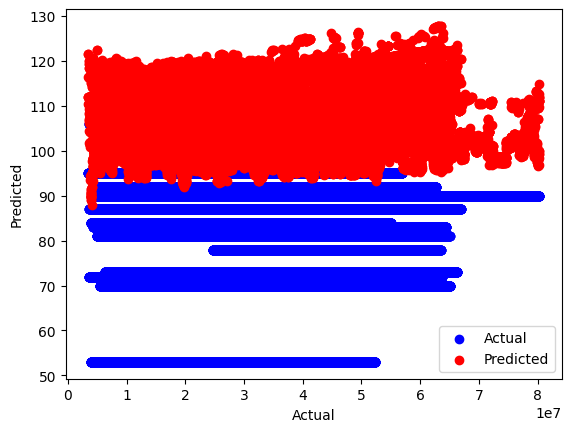

In [80]:


plt.scatter(X_test.index, y_test, c='blue', label='Actual')
plt.scatter(X_test.index, y_pred_lr, c='red', label='Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()


Model 2 Ridge Regression

In [83]:
model_ridge = make_pipeline(StandardScaler(), Ridge(alpha=1.0))
model_ridge.fit(X_train, y_train)

y_pred_ridge = model_ridge.predict(X_test)

mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

print(f"Ridge Regression MAE: {mae_ridge}")
print(f"Ridge Regression MSE: {mse_ridge}")


Ridge Regression MAE: 25.54621872170603
Ridge Regression MSE: 841.8094625773579


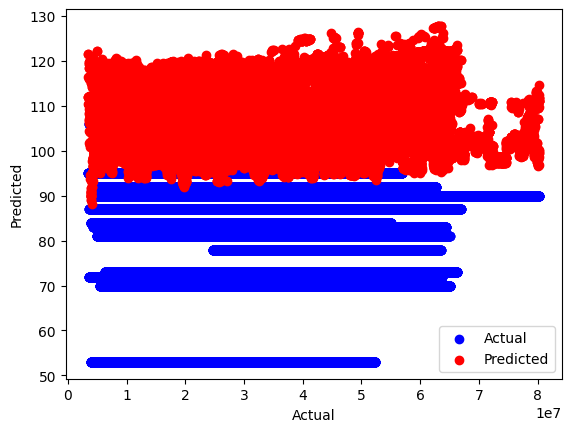

In [84]:

plt.scatter(X_test.index, y_test, c='blue', label='Actual')
plt.scatter(X_test.index, y_pred_ridge, c='red', label='Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()


Model  3 Lasso Regression

In [85]:
model_lasso = make_pipeline(StandardScaler(), Lasso(alpha=0.1))
model_lasso.fit(X_train, y_train)

y_pred_lasso = model_lasso.predict(X_test)

mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

print(f"Lasso Regression MAE: {mae_lasso}")
print(f"Lasso Regression MSE: {mse_lasso}")


Lasso Regression MAE: 25.89648566468866
Lasso Regression MSE: 852.3802353481968


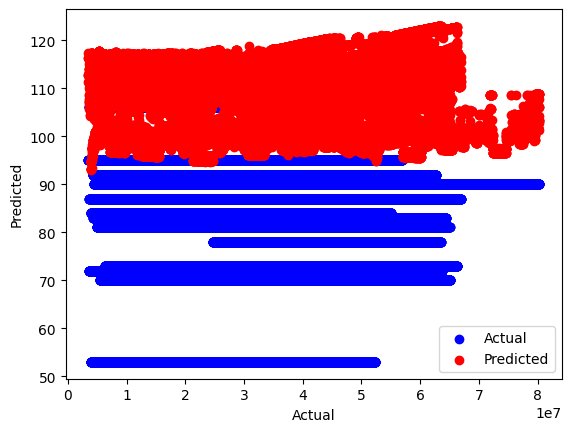

In [86]:
plt.scatter(X_test.index, y_test, c='blue', label='Actual')
plt.scatter(X_test.index, y_pred_lasso, c='red', label='Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()


Model 4 Dense

In [105]:
# Define the model architecture
model = Sequential()
model.add(BatchNormalization())
model.add(Dense(128, activation="relu", input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation="linear"))

# Compile the model
model.compile(loss="mean_squared_error", optimizer="adam",metrics=["mse","mae"])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64,validation_batch_size=64)




Epoch 1/10
5725/5725 [==============================] - 31s 5ms/step - loss: 354.8330 - mse: 354.8330 - mae: 12.8441 - val_loss: 375.1511 - val_mse: 375.1511 - val_mae: 15.1877
Epoch 2/10
5725/5725 [==============================] - 34s 6ms/step - loss: 167.1881 - mse: 167.1881 - mae: 10.2871 - val_loss: 294.1166 - val_mse: 294.1166 - val_mae: 13.4841
Epoch 3/10
5725/5725 [==============================] - 31s 5ms/step - loss: 153.7547 - mse: 153.7547 - mae: 9.8549 - val_loss: 317.6935 - val_mse: 317.6935 - val_mae: 14.0828
Epoch 4/10
5725/5725 [==============================] - 31s 5ms/step - loss: 143.9848 - mse: 143.9848 - mae: 9.5304 - val_loss: 339.2070 - val_mse: 339.2070 - val_mae: 14.5250
Epoch 5/10
5725/5725 [==============================] - 31s 5ms/step - loss: 133.4850 - mse: 133.4850 - mae: 9.1699 - val_loss: 331.6662 - val_mse: 331.6662 - val_mae: 14.2871
Epoch 6/10
5725/5725 [==============================] - 31s 5ms/step - loss: 121.9870 - mse: 121.9870 - mae: 8.7613 - 

In [106]:
y_pred=model.predict(X_test)


2863/2863 [==============================] - 5s 2ms/step


In [107]:
mae   = mean_absolute_error(y_test, y_pred)
mse  = mean_squared_error(y_test, y_pred)

print(f"Model MAE is {mae}")
print(f"Model MSE is {mse}")

Model MAE is 16.041941742658665
Model MSE is 420.2541782259499


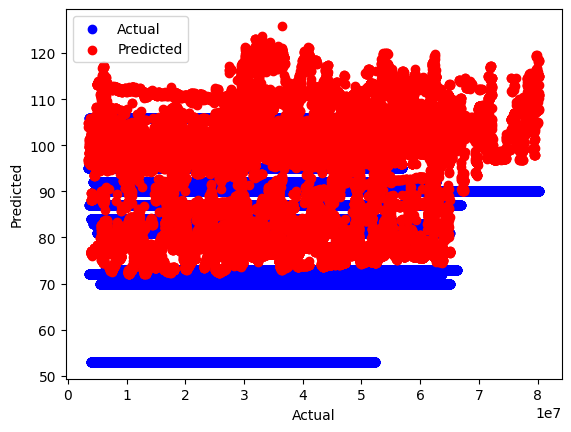

In [108]:
import matplotlib.pyplot as plt

plt.scatter(X_test.index, y_test, c='blue', label='Actual')
plt.scatter(X_test.index, y_pred, c='red', label='Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()
